<h1>1. Setup and Load Data</h1

<h2>1.1. Setup</h2>

In [10]:
# Importing TensorFlow library 
import tensorflow as tf
# Importing the os module for operating system-related functionalities
import os

<h2>1.2. Remove Dodgy Images</h2>

In [11]:
# Importing OpenCV library for computer vision tasks
import cv2
# Importing imghdr for determining the image file type
import imghdr

In [12]:
# Directory path for the dataset 
data_dir='/kaggle/input/bioandnonbiodata/data'

In [13]:
# Listing the contents of the directory specified by 'data_dir'
os.listdir(data_dir)

# N- Nonbiodedgradable
# B- Biodegradable

['N', 'B']

In [14]:
image_exts=['jpeg','jpg','bmp','png']

In [15]:
# Looping through each image classes
for image_class in os.listdir(data_dir):
    # Looping through Images in Each Class:
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Constructing the full path to the current image
        image_path = os.path.join(data_dir, image_class, image)
    
        # Attempting to read the image using OpenCV and determining its file type
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            # Checking if the image file type is not in the allowed list
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                # Removing the image file
                os.remove(image_path)
        
        # Handling exceptions (e.g., issues with image reading)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (133).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (133).jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (110).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (110).jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (160).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (160).jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (104).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (104).jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (4).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (4).jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (29).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (29).jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (91).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (91).jpg
Image not in ext list /kaggle/input

<h2>1.3 Load Data<h2>

In [16]:
# Importing NumPy for numerical operations and Matplotlib for data visualization
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Creating a TensorFlow image dataset from a directory
data=tf.keras.utils.image_dataset_from_directory('/kaggle/input/bioandnonbiodata/data')

Found 6861 files belonging to 2 classes.


In [18]:
# Converting the TensorFlow dataset to a NumPy iterator for compatibility, custom processing, and easy visualization
data_iterator=data.as_numpy_iterator()

In [19]:
# Obtaining the next batch of data from the NumPy iterator
batch=data_iterator.next()

In [20]:
#Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [21]:
# class1= non bio degradable
# class0 = biodegradable
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int32)

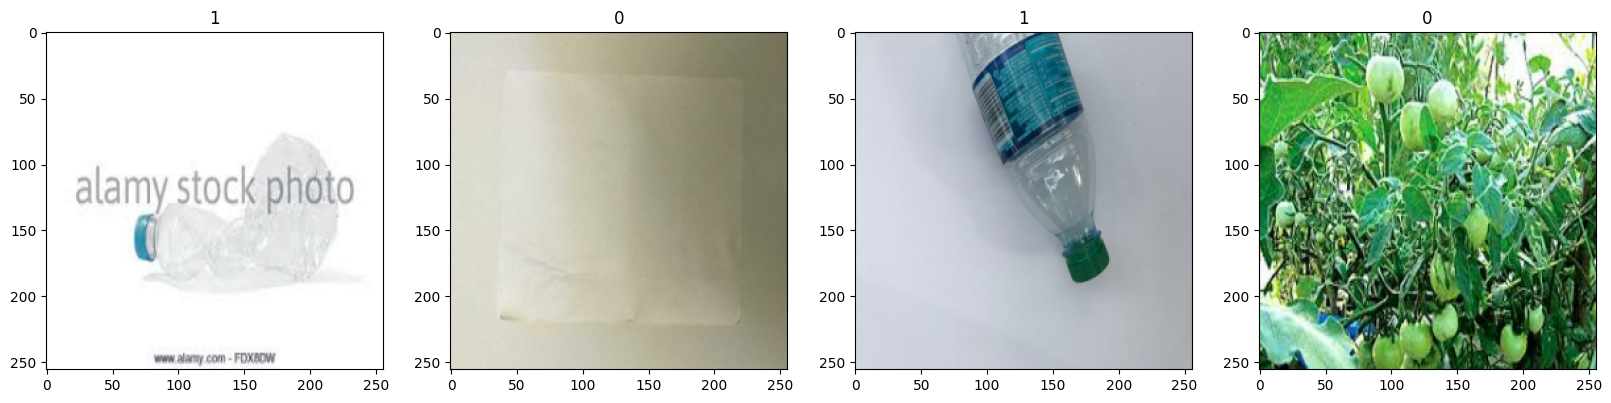

In [22]:
# Displaying the first 4 images from the current batch along with their corresponding labels
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
# Looping through the images in the batch
for idx,img in enumerate(batch[0][:4]):
    # Displaying each image as a subplot
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>2. Preprocess Data</h1

<h2>2.1. Scale Data</h2>

In [23]:
# Scaling pixel values in the image batch to the range [0, 1]
scaled=batch[0]/255

In [24]:
scaled.max()

1.0

In [25]:
# Scaling pixel values in the entire dataset using TensorFlow's map function
scaled_data=data.map(lambda x,y:(x/255,y))

In [26]:
# Creating a NumPy iterator from the scaled TensorFlow dataset
scaled_iterator=scaled_data.as_numpy_iterator()

In [27]:
batch=scaled_iterator.next()

In [28]:
batch[0].max()

1.0

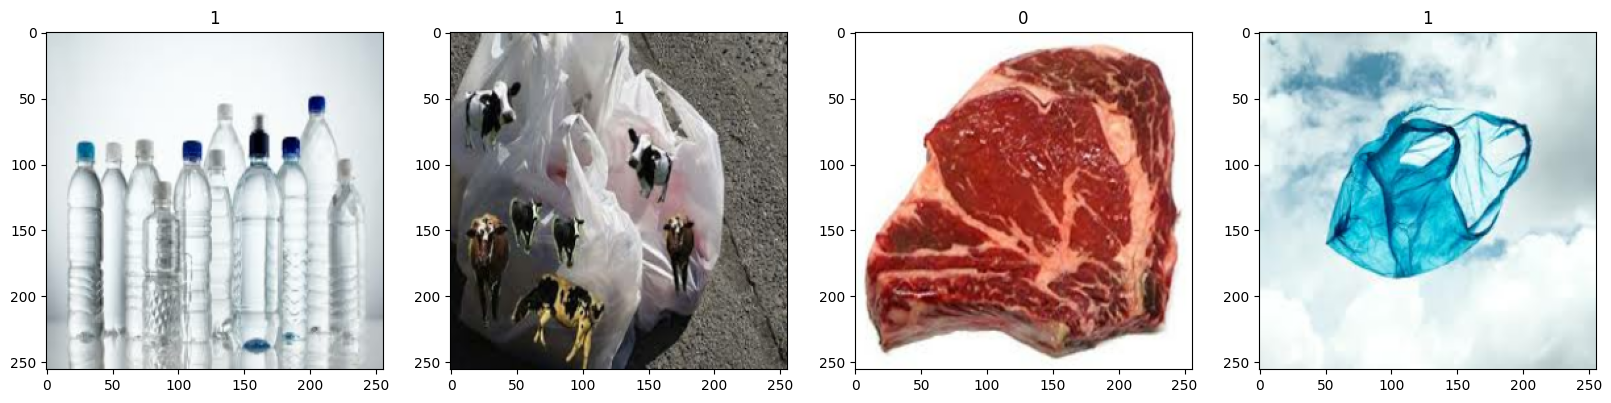

In [29]:
# Displaying the first 4 images from the current batch along with their corresponding labels
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
# Looping through the images in the batch
for idx,img in enumerate(batch[0][:4]):
    # Displaying each image as a subplot
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

<h2>2.2 Split Data</h2>

In [30]:
dataset_length=len(scaled_data)

In [31]:
# Calculating sizes for training, validation, and test sets based on the scaled dataset
train_size=int(dataset_length*.7) #150
val_size=int(dataset_length*.2)+1 #44
test_size=int(dataset_length*.1)  #21

In [32]:
train_size+val_size+test_size

215

In [33]:
# Creating training, validation, and test sets from the scaled dataset
train=scaled_data.take(train_size)
val=scaled_data.skip(train_size).take(val_size)
test=scaled_data.skip(train_size+val_size).take(test_size)

<h1>3. Build Model</h1>

In [34]:
# Importing necessary modules from TensorFlow Keras for building a convolutional neural network (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout


In [35]:
# Initializing a Sequential model for building a neural network layer by layer
model=Sequential()

In [36]:
# # Constructing a Convolutional Neural Network (CNN) for image classification:
# - Convolutional layers extract features
# - MaxPooling layers downsample and retain important information
# - Flattening prepares data for Dense layers
# - Dense layers perform classification tasks (ReLU for internal layers, sigmoid for binary output)

#Adding Convolutional and Pooling layers to the Sequential model
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

# Flattening the output and adding Dense layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
# Compiling the model using the Adam optimizer, Binary Crossentropy loss, and tracking accuracy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])# Yo k garne ho tha vayena , yei ho hyperparamter tuning vaneko?

In [38]:
# Displaying a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

<h2>3.2. Train</h2>

In [39]:
# Setting the directory path for storing logs during training
logdir='/kaggle/working/logs'

In [40]:
# Creating a TensorBoard callback for logging during model training
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
# Training the model for 20 epochs on the training set, validating on the validation set, and using TensorBoard for logging
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
150/150 [==============================] - 21s 105ms/step - loss: 0.5102 - accuracy: 0.7596 - val_loss: 0.4366 - val_accuracy: 0.8047
Epoch 2/20
150/150 [==============================] - 17s 114ms/step - loss: 0.4240 - accuracy: 0.8129 - val_loss: 0.4265 - val_accuracy: 0.8075
Epoch 3/20
150/150 [==============================] - 17s 108ms/step - loss: 0.3910 - accuracy: 0.8285 - val_loss: 0.3846 - val_accuracy: 0.8288
Epoch 4/20
150/150 [==============================] - 19s 121ms/step - loss: 0.3390 - accuracy: 0.8581 - val_loss: 0.3901 - val_accuracy: 0.8224
Epoch 5/20
150/150 [==============================] - 16s 104ms/step - loss: 0.2954 - accuracy: 0.8710 - val_loss: 0.3743 - val_accuracy: 0.8359
Epoch 6/20
150/150 [==============================] - 18s 119ms/step - loss: 0.2553 - accuracy: 0.8860 - val_loss: 0.4311 - val_accuracy: 0.8239
Epoch 7/20
150/150 [==============================] - 18s 120ms/step - loss: 0.2037 - accuracy: 0.9144 - val_loss: 0.4708 - val_ac

In [42]:
# Accessing the training history containing metrics over epochs
hist.history

{'loss': [0.5102201104164124,
  0.42398443818092346,
  0.39102649688720703,
  0.33897894620895386,
  0.295390248298645,
  0.25527095794677734,
  0.20369361340999603,
  0.15757973492145538,
  0.14881475269794464,
  0.1022520586848259,
  0.08733192086219788,
  0.0779794231057167,
  0.08126246184110641,
  0.05702628567814827,
  0.04141782596707344,
  0.03940019756555557,
  0.05456358566880226,
  0.048501066863536835,
  0.021272437646985054,
  0.013258754275739193],
 'accuracy': [0.7595833539962769,
  0.8129166960716248,
  0.8285416960716248,
  0.8581249713897705,
  0.8710416555404663,
  0.8860416412353516,
  0.9143750071525574,
  0.9375,
  0.9439583420753479,
  0.9610416889190674,
  0.9722916483879089,
  0.9741666913032532,
  0.9764583110809326,
  0.9793750047683716,
  0.9866666793823242,
  0.987291693687439,
  0.9833333492279053,
  0.9883333444595337,
  0.9943749904632568,
  0.9950000047683716],
 'val_loss': [0.43660280108451843,
  0.42645880579948425,
  0.3845623731613159,
  0.390148669

<h2>3.3 Plot Performance</h2>

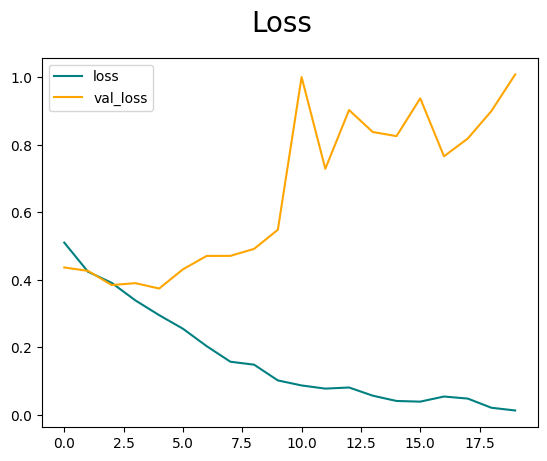

In [43]:
# Plotting training and validation loss over epochs
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

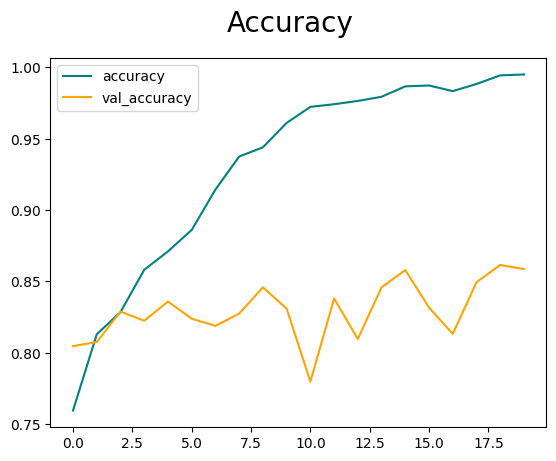

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h1>4. Evaluate Performance</h1>

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 297ms/step


In [48]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.8391166925430298,Recall:0.7940298318862915,Accuracy:0.8162328004837036


<h1>Test</h1>

In [ ]:
import cv2

def predict_class(image_path, model):
    # Read the image
    img = cv2.imread(image_path)

    # Resize the image to match the input size of the model
    resized_img = tf.image.resize(img, (256, 256))

    # Expand dimensions to create a batch of size 1
    input_image = np.expand_dims(resized_img / 255, 0)

    # Use the trained model to make a prediction
    prediction = model.predict(input_image)

    # Check the prediction and print the result
    if prediction > 0.5:
        return "NonBiodegradable"
    else:
        return "BioDegradable"

# Example usage:
image_path = '/kaggle/input/testset/N__402.jpg'
result = predict_class(image_path, model)
print(f'Predicted class is {result}')

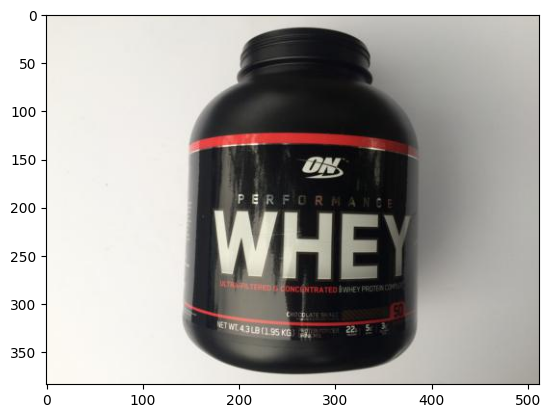

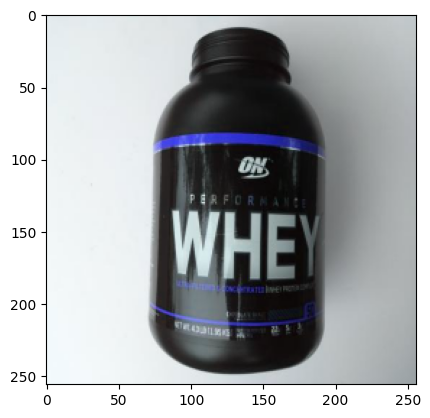

In [51]:
resize.shape

TensorShape([256, 256, 3])

In [52]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 105ms/step


In [54]:
yhat

array([[1.]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is NonBiodegradable')
else:
    print(f'Predicted class is BioDegradable')

Predicted class is NonBiodegradable


<h1>Save the Model</h1>

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save('my_model.keras')

1/1 [==============================] - 0s 21ms/step
Predicted class is NonBiodegradable


<h1></h1>